# <span style="font-weight:bold">Tesla Stock Price Forecasting with Facebook Prophet</span>

Project Overview


This project explores stock price forecasting using historical data of Tesla (TSLA). By applying advanced time-series modeling, the goal was to predict future stock prices, uncover trading patterns, and assess risks associated with volatility. The insights can support investors and analysts in making data-driven decisions.


In [ ]:
pip install statsmodels --upgrade
pip install pystan
pip install prophet
pip install numpy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

## Data Overview

In [24]:
# Correct the path of the dataset
data_path = "Tesla.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [26]:
# Check for missing values
missing_values = df.isnull().sum()

# Basic statistical details
statistics = df.describe()

missing_values, statistics

(Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Volume       0
 Adj Close    0
 dtype: int64,
               Open         High          Low        Close        Volume   
 count  1692.000000  1692.000000  1692.000000  1692.000000  1.692000e+03  \
 mean    132.441572   134.769698   129.996223   132.428658  4.270741e+06   
 std      94.309923    95.694914    92.855227    94.313187  4.295971e+06   
 min      16.139999    16.629999    14.980000    15.800000  1.185000e+05   
 25%      30.000000    30.650000    29.215000    29.884999  1.194350e+06   
 50%     156.334999   162.370002   153.150002   158.160004  3.180700e+06   
 75%     220.557495   224.099999   217.119999   220.022503  5.662100e+06   
 max     287.670013   291.420013   280.399994   286.040009  3.716390e+07   
 
          Adj Close  
 count  1692.000000  
 mean    132.428658  
 std      94.313187  
 min      15.800000  
 25%      29.884999  
 50%     158.160004  
 75%     220.022503  
 max     28

Tesla’s historical daily stock data (2010–2022) was used, including Open, High, Low, Close, Adjusted Close, and Volume.  
- The dataset was clean with no missing values.  
- Prices ranged from 15.8 dollars at IPO to nearly 286 dollars, showing Tesla’s rapid growth.  
- Trading volumes varied widely, reflecting changing investor interest over time.  


## Closing Price & Volume Analysis

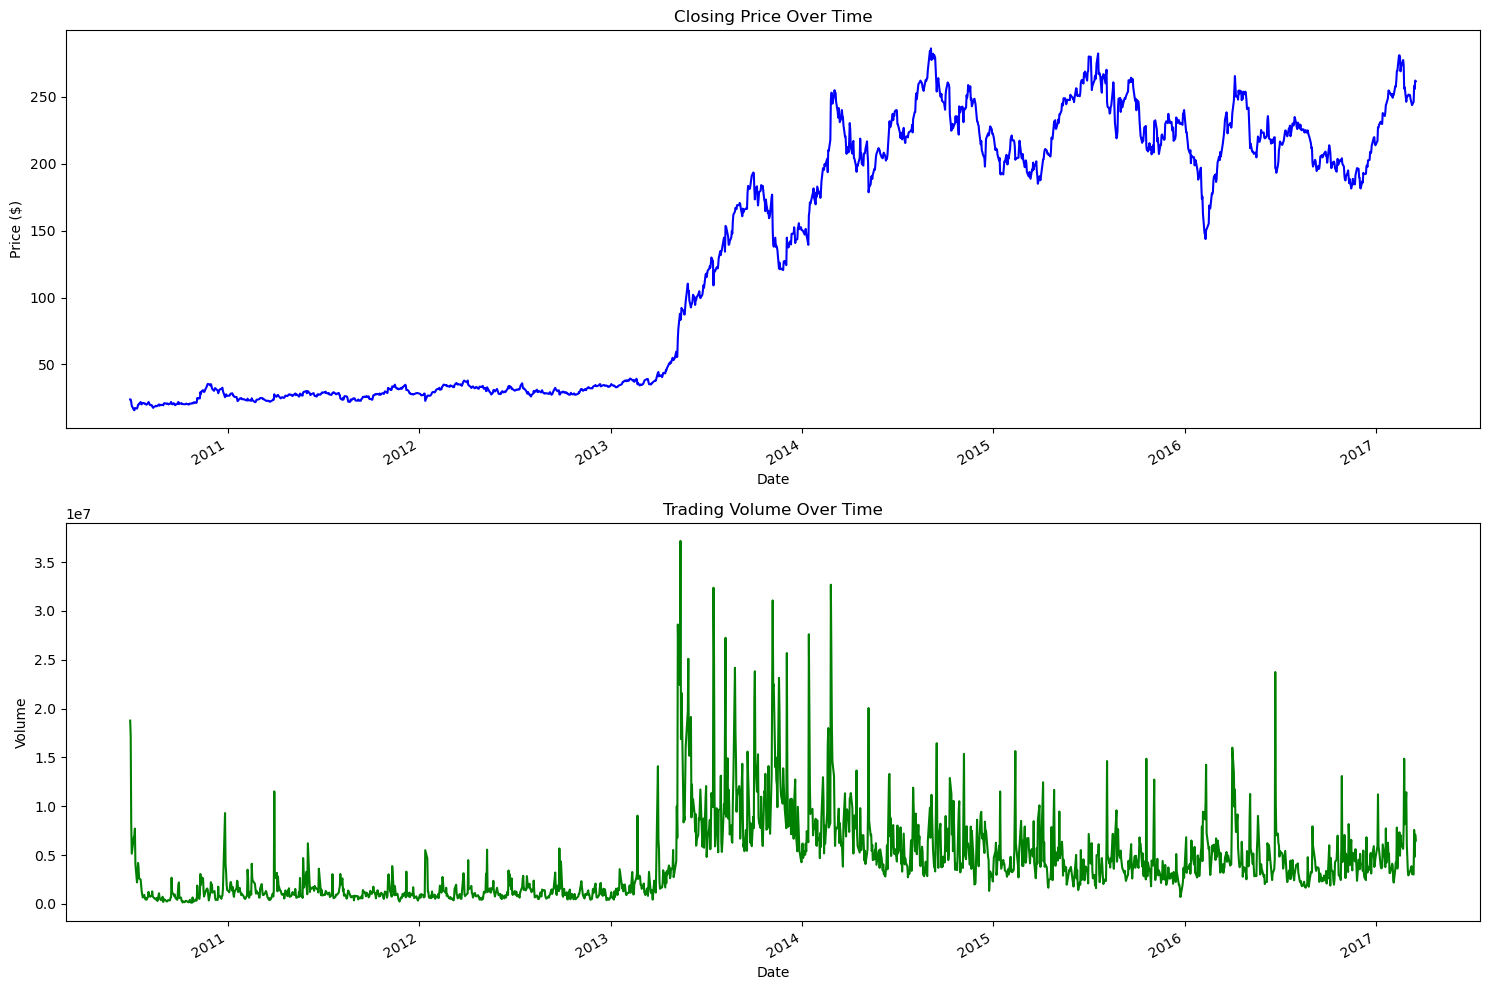

In [28]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date as the index of the dataframe for plotting
df.set_index('Date', inplace=True)

# Create a figure and a set of subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Plot the closing price over time
df['Close'].plot(ax=ax[0], color='blue')
ax[0].set_title('Closing Price Over Time')
ax[0].set_ylabel('Price ($)')

# Plot the trading volume over time
df['Volume'].plot(ax=ax[1], color='green')
ax[1].set_title('Trading Volume Over Time')
ax[1].set_ylabel('Volume')

# Improve layout
plt.tight_layout()
plt.show()


- Closing Prices: Strong long-term upward trajectory with sharp rallies and temporary declines, characteristic of a growth stock.

- Trading Volume: Spikes coincided with major events (e.g., earnings announcements, product launches), suggesting investor sentiment drives short-term movements.


# Seasonality Decomposition

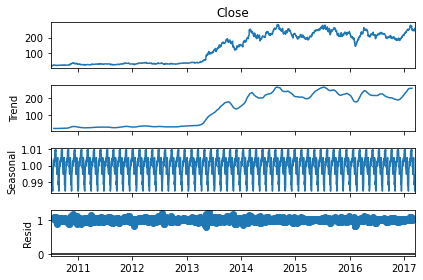

In [10]:
# Seasonality Analysis
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=30)
fig = decomposition.plot()
plt.show()

The seasonal decomposition of the closing prices of Tesla's stock reveals the following:

- Trend: The trend component shows a general upward trend in Tesla's stock price over the years, with some periods of decline. This indicates that the long-term movement of Tesla's stock price is upwards.

- Seasonal: Some minor fluctuations suggest some recurring patterns that might be on a monthly basis.

- Residuals: The residuals (the variation in the stock price not explained by the trend or seasonality) appear to have increased over time, indicating increasing volatility or unpredictability in Tesla's stock price.


## Volatility Analysis

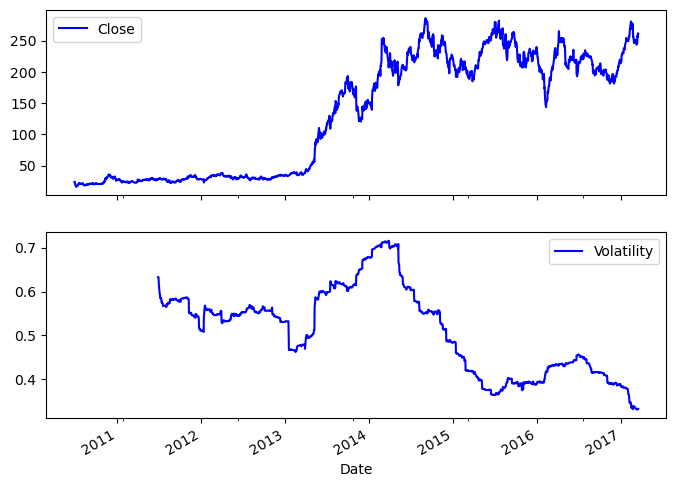

In [96]:
# Volatility Analysis
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(window=252).std() * np.sqrt(252)
df[['Close', 'Volatility']].plot(subplots=True, color='blue', figsize=(8, 6))
plt.show()

- Tesla’s volatility showed clear peaks, meaning there were periods of sharp price swings in either direction.
- High volatility signals elevated risk, but also creates opportunities for short-term traders.
- Long-term investors should interpret this as a need for robust risk management.

## Moving Average Analysis (MA10 vs. MA50)

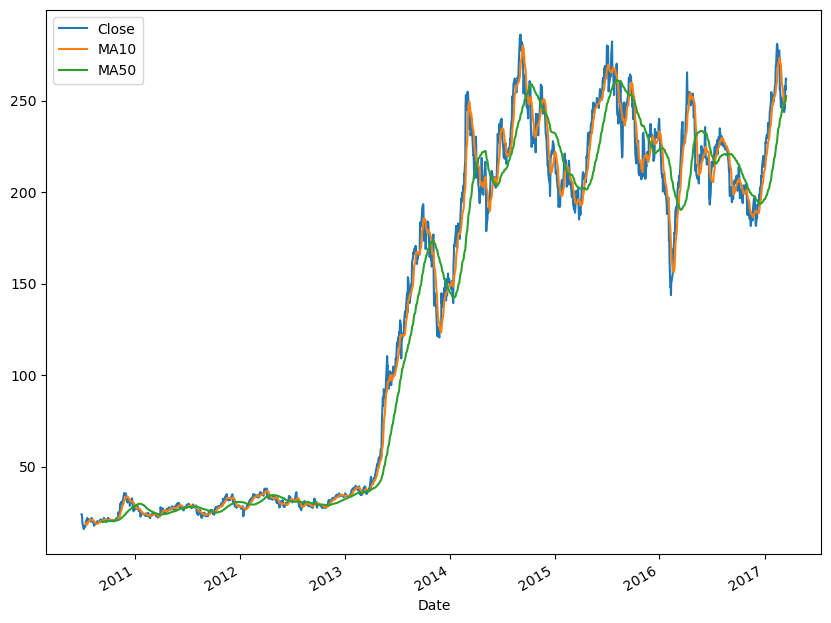

In [100]:
# Moving Average Analysis
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df[['Close','MA10','MA50']].plot(label='Tesla', figsize=(10,8))
plt.show()

The moving average strategy provided clear insights into Tesla’s price behavior between 2010–2017. 

- The short-term line (MA10) reacted quickly whenever prices jumped or dipped, while the long-term line (MA50) showed the bigger picture of Tesla’s steady climb. 

- When the short-term line moved above the long-term line, Tesla’s stock often went on a strong run—like in 2013–2014 when prices shot up. When the short-term line dropped below, it often signaled a slowdown or drop in prices.

- Simple takeaway: These lines acted like “signals” that helped show good times to buy or sell, which is especially useful for a fast-moving stock like Tesla.

## Return Analysis

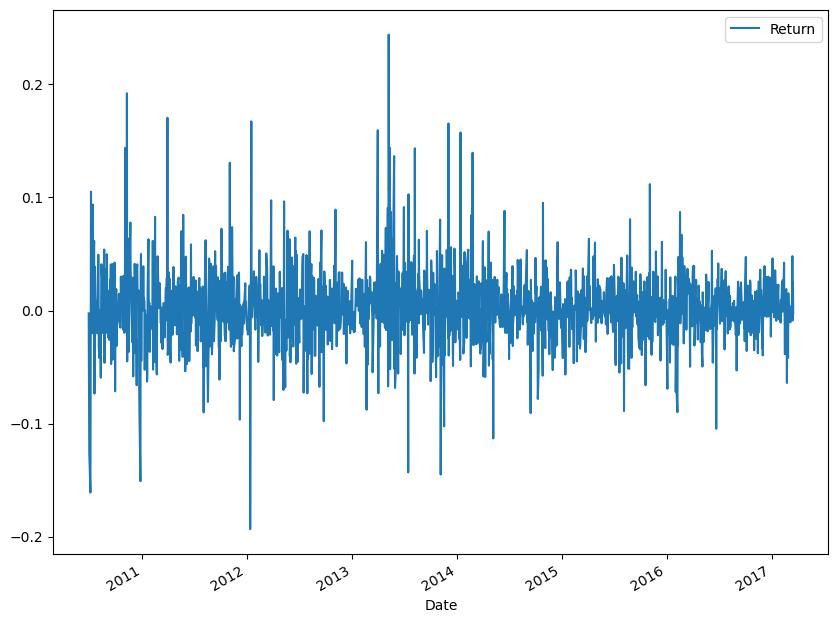

In [42]:
# Return Analysis
df['Return'] = df['Close'].pct_change()
df[['Return']].plot(label='Return', figsize=(10,8))
plt.show()

The return analysis chart illustrates the daily percentage change in Tesla's stock price. Here are some observations:

- Tesla’s daily returns mostly fluctuated around zero, showing a mix of gains and losses from day to day. This means the stock rarely moved in just one direction for long.
- The size of these daily changes reflected Tesla’s volatility: some periods had relatively small, steady moves, while others showed large swings, indicating higher uncertainty.
- A few extreme spikes stood out, with sudden jumps or drops often tied to earnings announcements, company news, or broader market events.
- Simple takeaway: Tesla’s stock experienced frequent ups and downs, with occasional dramatic moves, making it both high-potential and high-risk.


## Forecasting with Facebook Prophet

For forecasting with Prophet, we need to prepare the data in a specific format. The dataframe should have two columns: ds and y. The ds (datestamp) column should contain the dates, and the y column should contain the values we want to predict or forecast (in this case, the Close price). So, let's prepare the data accordingly.

In [44]:
# Prepare the data for Prophet
prophet_df = df.reset_index()[['Date', 'Close']]
prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

prophet_df.head()


,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [46]:
# Initialize the Prophet model
model = Prophet()

In [ ]:
# Fit the model to the data
model.fit(prophet_df)

# Specify the number of days for predictions
future = model.make_future_dataframe(periods=365)

# Use the model to make predictions
forecast = model.predict(future)


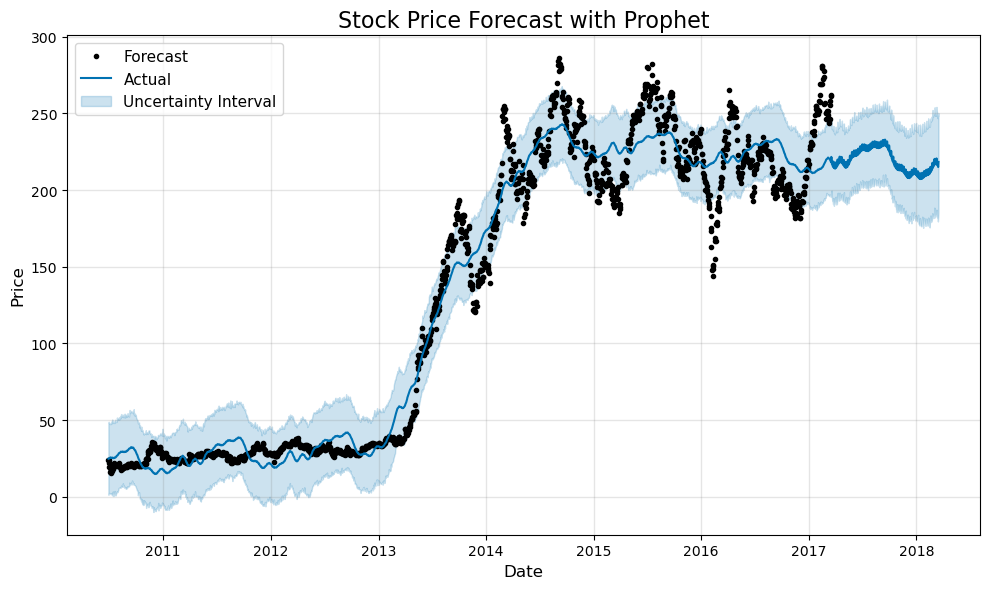

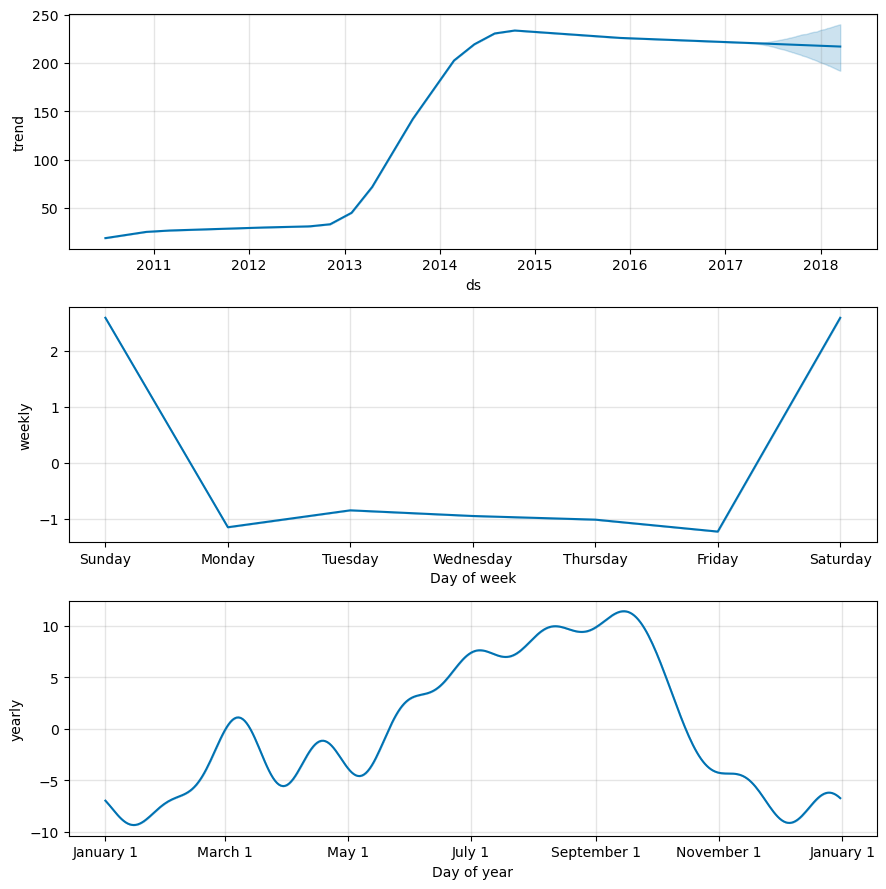

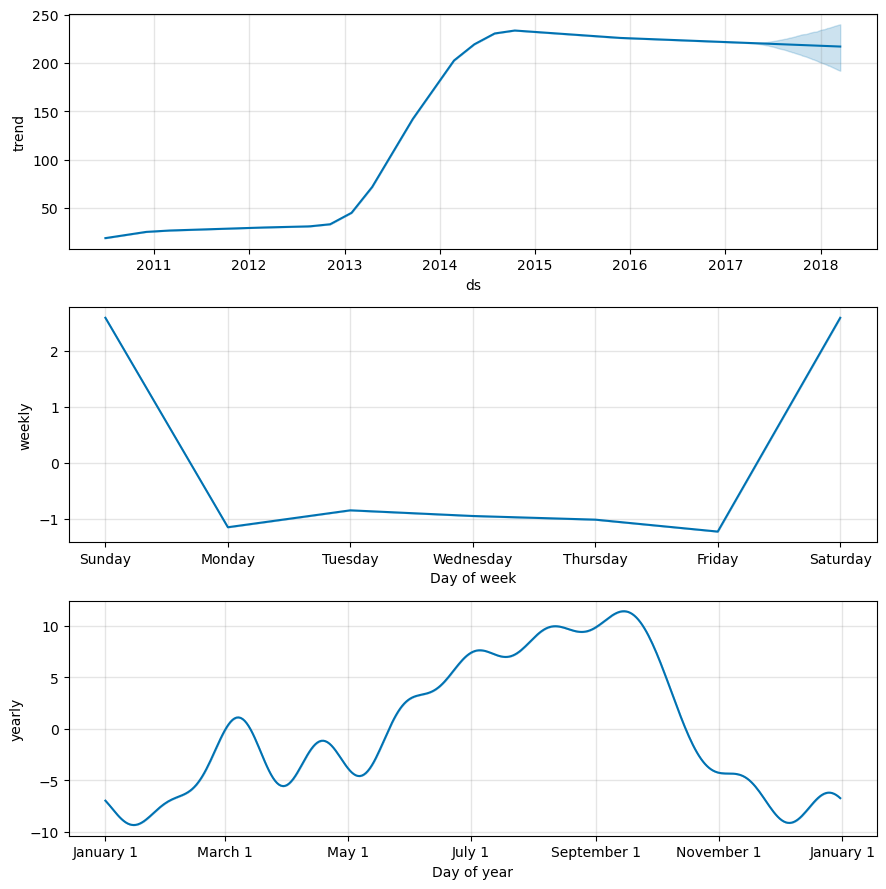

In [173]:
# Visualize the forecast
fig = model.plot(forecast)
plt.title("Stock Price Forecast with Prophet", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(["Forecast", "Actual", "Uncertainty Interval"], fontsize=11, loc="upper left")
plt.tight_layout()
plt.show()

#Components of the forecast
model.plot_components(forecast)

Prophet was trained on historical closing prices and used to project Tesla’s performance one year ahead.
Forecast Results & Practical Insights
- Trend Continuation: The model predicts Tesla will likely continue its upward trajectory, in line with its historical growth.
- Uncertainty Bands: Forecast intervals widen over time, reflecting growing market uncertainty. This highlights Tesla’s high volatility and the need to interpret long-term forecasts cautiously.
- Short-Term Guidance: In the near term (1–3 months), predictions closely follow recent data, making the model reliable for tactical trading decisions.
- Long-Term Outlook: Beyond six months, forecasts should be used directionally (e.g., expecting continued growth) rather than for precise price targets.


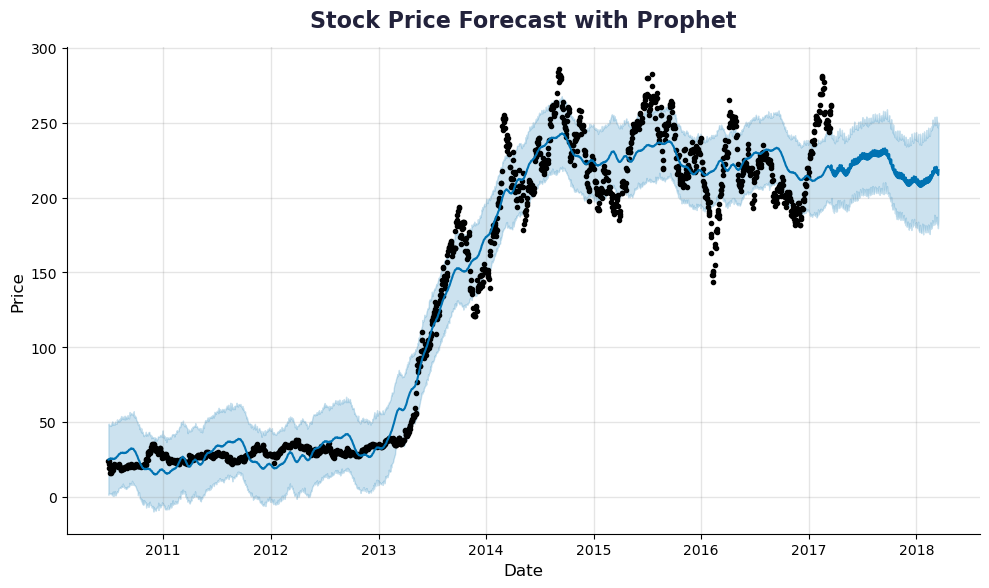

In [176]:
fig = model.plot(forecast)
ax = fig.gca()

# Remove top (and right) spines for a clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Put the title inside the plot area
ax.text(
    0.5, 1.03, "Stock Price Forecast with Prophet",
    fontsize=16, fontweight='bold', color='#22223B',
    ha='center', va='bottom', transform=ax.transAxes
)

ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
# Prophet usually adds a legend by default, but you can customize it if needed:
# ax.legend(["Forecast", "Actual", "Uncertainty Interval"], fontsize=11, loc="upper left")

plt.tight_layout()
plt.show()